In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

In [3]:
img = image.load_img("/content/NPK_asli.png")

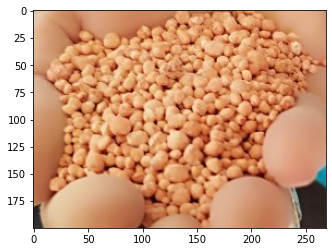

In [4]:
plt.imshow(img)

In [8]:
cv2.imread("/content/NPK_asli.png").shape

(200, 269, 3)

In [12]:
train = ImageDataGenerator(rescale= 1/255)
validation = ImageDataGenerator(rescale= 1/255)

In [14]:
train_dataset = train.flow_from_directory('/content/train',
                                          target_size = (200,200),
                                          batch_size = 3,
                                          class_mode = 'binary')
validation_dataset = train.flow_from_directory('/content/validation',
                                          target_size = (200,200),
                                          batch_size = 3,
                                          class_mode = 'binary')

Found 12 images belonging to 3 classes.
Found 6 images belonging to 3 classes.


In [15]:
train_dataset.class_indices

{'.ipynb_checkpoints': 0, 'asli': 1, 'palsu': 2}

In [16]:
train_dataset.classes

array([1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2], dtype=int32)

In [17]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    tf.keras.layers.Dense(1, activation = 'sigmoid')
                                    ])

In [19]:
model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(lr=0.001),
              metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [24]:
model_fit = model.fit(train_dataset,
                      epochs= 10,
                      validation_data= validation_dataset)

Epoch 1/10
4/4 [==============================] - 2s 414ms/step - loss: -13781104.0000 - accuracy: 0.5000 - val_loss: -15579220.0000 - val_accuracy: 0.5000
Epoch 2/10
4/4 [==============================] - 2s 414ms/step - loss: -17252072.0000 - accuracy: 0.5000 - val_loss: -19276006.0000 - val_accuracy: 0.5000
Epoch 3/10
4/4 [==============================] - 2s 412ms/step - loss: -21580856.0000 - accuracy: 0.5000 - val_loss: -24051926.0000 - val_accuracy: 0.5000
Epoch 4/10
4/4 [==============================] - 2s 427ms/step - loss: -26546306.0000 - accuracy: 0.5000 - val_loss: -29438550.0000 - val_accuracy: 0.5000
Epoch 5/10
4/4 [==============================] - 2s 408ms/step - loss: -32054942.0000 - accuracy: 0.5000 - val_loss: -35020968.0000 - val_accuracy: 0.5000
Epoch 6/10
4/4 [==============================] - 2s 413ms/step - loss: -38046132.0000 - accuracy: 0.5000 - val_loss: -41059324.0000 - val_accuracy: 0.5000
Epoch 7/10
4/4 [==============================] - 2s 413ms/step 

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

In [25]:
dir_path = '/content/test'
for i in os.listdir(dir_path):
  img = image.load_img(dir_path + '//' + i, target_size= (200,200))
  plt.imshow(img)
  plt.show()

  X = image.img_to_array(img)
  X = np.expand_dims(X,axis=0)
  images = np.vstack([X])
  val = model.predict(images)
  if val == o:
    print("pupuk ini palsu")
  else:
    print("pupuk ini asli")

IsADirectoryError: ignored